## 확률적 데이터와 확률변수

### 확률적 데이터

- **결정론적 데이터(deterministic data)** : 언제 누가 얻더라도 항상 같은 값이 나오는 데이터
- **확률적 데이터(random data, stochastic data)** : 정확히 예측할 수 없는 값이 나오는 데이터

- 데이터가 확률적이 되는 이유
    -  여러 조건이나 상황에 따라 데이터값이 영향을 받기 때문 
    -  측정 시에 발생하는 오차 때문

### 분포(distribution)
- 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 정보
- 시각적으로 표현
    - 카운트 플롯(count plot) : 범주형 데이터의 경우 
    - 히스토그램(histogram) : 실수형 데이터의 경우

### 기술통계(descriptive statistics)
- 분포의 특징을 나타내는 여러가지 숫자를 계산하여 그 숫자로서 분포를 나타내는 것
- 대표적인 기술통계
    - 표본평균, 표본중앙값, 표본최빈값
    - 표본분산, 표본표준편차
    - 표본왜도, 표본첨도

### 표본평균
- 일반적으로 부르는 평균
- 데이터 분포의 대략적인 위치를 나타냄

    $ 
    m = \bar{x} = \dfrac{1}{N}\sum_{i=1}^{N} x_i 
    $


### 표본중앙값(sample median)
- 전체 자료를 크기별로 정렬했을 때 가장 중앙에 위치하는 값
- 표본이 비대칭적으로 생겼을 때 사용 : 이상치(outlier)
- 전체 표본 개수가 $N$인 경우,
    - $N$이 홀수이면 : 중앙값은 $(N + 1)/2$번째 표본의 값
    - $N$이 짝수이면 : 중앙값은 $N/2$번째 표본의 값과 $N/2 + 1$번째 표본의 값의 평균

### 표본최빈값(most frequent value)
- 데이터값 중 가장 빈번하게 나오는 값
- 범주값일 경우에 적용
- 연속적일 경우에는 최빈값을 정하기가 어렵다.

### 대푯값 계산 With Python
- 범주형 데이터는 실수로 바꾼 다음에 대푯값을 계산
- `mean()` : 표본평균 계산
- `median()` : 표본중앙값 계산
- `argmax()` : 이산데이터의 최댓값 계산
- `histogram()` : 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산.

### 히스토그램으로 이용한 붓꽃 데이터 분포

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


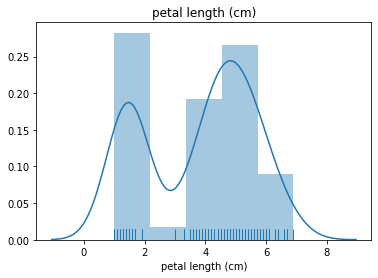

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
x = df['petal length (cm)'].values

sns.distplot(x, rug=True)
plt.title('petal length (cm)')
plt.xlabel('petal length (cm)')
plt.show()

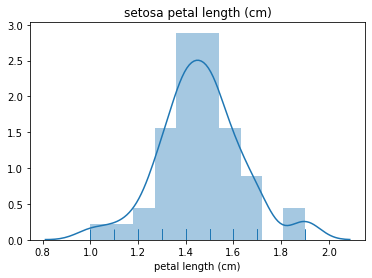

In [10]:
x = df[df.species == "setosa"]['petal length (cm)'].values

sns.distplot(x, rug=True)
plt.title('setosa petal length (cm)')
plt.xlabel('petal length (cm)')
plt.show()

### 대칭분포
- 표본평균, 표본중앙값, 표본최빈값은 분포의 모양에 따라 다음과 같은 특성을 보인다.
    * 분포가 표본평균을 기준으로 대칭인 대칭(symmetric)분포이면 표본중앙값은 표본평균과 같다.
    * 분포가 대칭분포이면서 하나의 최고값만을 가지는 단봉분포이면 표본최빈값은 표본평균과 같다.
    * 이상치(outlier)에 표본평균이 가장 크게 영향을 받고 표본최빈값이 가장 적게 영향을 받는다.

### 분산과 표준편차
- 평균이나 기댓값이 분포의 **위치**를 대표하는 것이라면 분산은 분포의 **폭(width)**을 대표하는 값

    $
    \text{표준편차} = \sqrt{\text{분산}}
    $


- 표본분산, $\bar{x}$은 표본평균.

    $
    s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})^2 
    $

### 표본분산 및 표본표준편차의 계산 With Python
   - `var()` : 분산
   - `std()` : 표준편차
   - `ddof`  : 이 인수를 사용하면 비편향 표본분산과 표본표준편차를 구할 수 있다.

### 표본비대칭도(sample skewness)
- 평균과의 거리의 세제곱을 이용하여 구한 특징값
- **표본비대칭도가 0이면 분포가 대칭**

    $ 
    \text{표본비대칭도} = 
    \frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
    $
    
<img src="https://datascienceschool.net/upfiles/fbef84feab4646cf918e1b474ef07290.png" style="width=100%;">

### 표본첨도(sample kurtosis)
- 평균과의 거리의 네제곱을 이용하여 구한 특징값

    $
    \text{표본첨도} = 
    \frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
    $


### 표본모멘트
- 분산, 비대칭도, 첨도를 구하기 위해 제곱, 세제곱, 네제곱을 하는 것처럼 $k$제곱을 이용하여 구한 모멘트

    $ 
    \text{표본모멘트} = 
    \frac{1}{N}\sum_{i = 1}^{N} x^k_i
    $
    
    
- 2차 표본모멘트 이상은 평균을 뺀 **표본중앙모멘트(sample centered moment)**값을 사용하기도 한다. 

    $ 
    \text{표본중앙모멘트} = 
    \frac{1}{N}\sum_{i = 1}^{N} (x_i - \bar{x})^k
    $

### 확률변수
- 수학적으로 확률공간의 표본을 입력으로 받아서 실수인 숫자로 바꾸어 출력하는 함수
- 출력되는 실수가 데이터의 값

    $ 
    \omega \in \Omega \;\;\; \xrightarrow{\text{확률변수 } X} \;\; x \in \mathbf{R} 
    $

    $
    X(\omega) = x
    $


### 이산확률변수, 연속확률변수
- 이산확률변수 : 확률변수값이 연속적(continuous)이지 않고 떨어져(discrete) 있도록 정의할 수 있을 때
- 연속확률변수 : 연속적이고 무한대의 실수 표본값을 가지는 확률변수

### 확률변수를 사용한 데이터 분석
 1. 데이터를 수집, 전처리.
 2. 수집한 데이터가 어떤 확률변수의 표본 데이터라고 가정.
 3. 데이터를 사용하여 해당 확률변수의 확률분포함수의 모양을 결정.
 4. 결정된 확률변수로부터 다음에 생성될 데이터나 데이터 특성을 예측.

- 데이터에서 확률분포함수의 모양을 구하는 방법
    - 기술통계
        1. 데이터 분포가 가지는 표본평균, 표본분산 등의 기술통계값을 구한다.
        2. 이 값과 같은 기술통계값을 가지는 확률분포함수를 찾는다.